In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
neuro = pd.read_csv('chemistry.csv')

In [4]:
neuro.head(5)

,Unnamed: 0,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear
0,3,6,18761,9,1,"University of California, Berkeley",95457486.0,-1,1984
1,117,130,53604,33687,1,Utrecht University,193662353.0,-1,1997
2,137,151,20,24,2,Baylor College of Medicine,181547552.0,-1,-1
3,147,161,12561,52639,1,"University of Washington, Seattle",201448701.0,1967,1971
4,190,212,188,189,1,Harvard University,136199984.0,-1,1927


In [5]:
mentorship = pd.read_csv('/Users/yanmemgxing/Nutstore Files/scientific group/mentorship.csv')

In [6]:
mentorship.head(5)

,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear
0,2,2,3,1,"University of California, Berkeley",95457486.0,2000,2005
1,3,4,3,2,"University of California, Berkeley",95457486.0,2003,2006
2,5,6,3,1,"University of California, Berkeley",95457486.0,2002,2008
3,6,18761,9,1,"University of California, Berkeley",95457486.0,-1,1984
4,7,10,16,2,"Washington University, Saint Louis",204465549.0,-1,-1


In [7]:
mentors = set(mentorship.MentorID)

In [8]:
neuro_surviver = pd.DataFrame(neuro['MenteeID'][neuro.MenteeID.isin(mentors)].drop_duplicates())

In [9]:
neuro_surviver['surviver'] = 1

In [10]:
neuro_surviver.head(5)

,MenteeID,surviver
0,18761,1
2,20,1
3,12561,1
4,188,1
5,189,1


In [11]:
neuro_mentees = neuro[['MenteeID','MentorID','StopYear']]

In [12]:
neuro_mentees.head(3)

,MenteeID,MentorID,StopYear
0,18761,9,1984
1,53604,33687,1997
2,20,24,-1


In [13]:
neuro_mentees_surviver_0 = neuro_mentees.merge(neuro_surviver,on='MenteeID',how='left')

In [14]:
neuro_mentees_surviver_0.head(5)

,MenteeID,MentorID,StopYear,surviver
0,18761,9,1984,1.0
1,53604,33687,1997,NaN
2,20,24,-1,1.0
3,12561,52639,1971,1.0
4,188,189,1927,1.0


In [16]:
SR = []
for year in range(1960,2010):
    neuro_mentees_surviver = neuro_mentees_surviver_0[neuro_mentees_surviver_0.StopYear==year]
    sr = len(set(neuro_mentees_surviver['MenteeID'][neuro_mentees_surviver.surviver==1]))/len(set(neuro_mentees_surviver['MenteeID']))
    SR.append((year,sr))

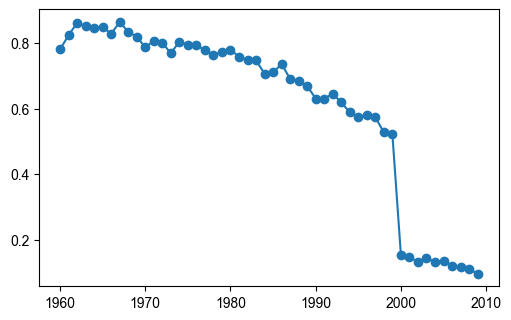

In [17]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')
x = [k[0] for k in SR]
y = [k[1] for k in SR]
ax.plot(x,y,marker='o')


##### Surviver in Pubs.

In [18]:
neuro_mentees_surviver_0.head(5)

,MenteeID,MentorID,StopYear,surviver
0,18761,9,1984,1.0
1,53604,33687,1997,NaN
2,20,24,-1,1.0
3,12561,52639,1971,1.0
4,188,189,1927,1.0


In [20]:
pid_mag_openalex = pd.read_csv('pid_mag_openalex.csv')

In [21]:
pid_mag_openalex = pid_mag_openalex.rename(columns={'PID':'MenteeID'})

In [22]:
pid_mag_openalex.head(5)

,MenteeID,MAGAuthorID,author_id
0,1,2.171828e+09,A2171827615
1,2,2.082173e+09,A2082172561
2,3,2.110166e+09,A2110165986
3,4,2.183264e+09,A2183263527
4,5,2.156587e+09,A2156586888


In [23]:
neuro_mentees_surviver_0 = neuro_mentees_surviver_0.merge(pid_mag_openalex,on='MenteeID',how='left')

In [24]:
neuro_mentees_surviver_0.head(5)

,MenteeID,MentorID,StopYear,surviver,MAGAuthorID,author_id
0,18761,9,1984,1.0,2.809701e+09,A2809701389
1,53604,33687,1997,NaN,1.874842e+09,A1874842480
2,20,24,-1,1.0,2.169128e+09,A2169128453
3,12561,52639,1971,1.0,2.307650e+09,A2307649786
4,188,189,1927,1.0,2.039886e+09,A2039885679


In [25]:
surviver_with_OpenALexID = neuro_mentees_surviver_0[['MenteeID','StopYear','author_id']][(neuro_mentees_surviver_0.surviver==1)
                                                                                        &(~neuro_mentees_surviver_0.author_id.isnull())
                                                                                        &(neuro_mentees_surviver_0.StopYear>-1)]

In [26]:
surviver_with_OpenALexID.head(5)

,MenteeID,StopYear,author_id
0,18761,1984,A2809701389
3,12561,1971,A2307649786
4,188,1927,A2039885679
10,13297,1986,A2251248762
11,286,1977,A2293671064


In [27]:
career_span = pd.read_csv('career_span.csv')

In [28]:
career_span.head(5)

,author_id,first_pub_year,last_pub_year,career_len
0,A100443890,1985,2021,36
1,A10276863,2010,2022,12
2,A102980197,1994,2022,28
3,A1042434965,2004,2022,18
4,A106505410,2003,2008,5


In [29]:
surviver_with_OpenALexID = surviver_with_OpenALexID.merge(career_span,on='author_id',how='left')

In [30]:
surviver_with_OpenALexID.sample(5)

,MenteeID,StopYear,author_id,first_pub_year,last_pub_year,career_len
11213,98103,1993,A2573395430,1988.0,2022.0,34.0
12084,106721,2002,A281638742,2001.0,2013.0,12.0
13279,144930,2001,A2111899898,2001.0,2022.0,21.0
4592,69355,1970,A2141576179,1964.0,2008.0,44.0
1895,53016,1984,A1975592966,1989.0,2020.0,31.0


In [31]:
surviver_careerLen = surviver_with_OpenALexID[['StopYear','career_len']][~surviver_with_OpenALexID.career_len.isnull()]

In [32]:
surviver_careerLen.head(5)

,StopYear,career_len
0,1984,36.0
1,1971,38.0
2,1927,45.0
3,1986,26.0
4,1977,43.0


In [33]:
surviver_careerLen = surviver_careerLen[surviver_careerLen.StopYear<2000]

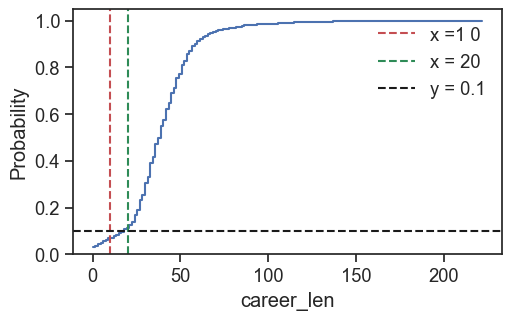

In [34]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

sns.histplot(data=surviver_careerLen, x="career_len",stat='probability',cumulative=1,fill=0,element="step",
             ax=ax)
ax.axvline(x=10,color='r',ls='--',label='x =1 0')
ax.axvline(x=20,color='seagreen',ls='--',label='x = 20')
ax.axhline(y=0.1,color='k',ls='--',label='y = 0.1')
plt.legend(frameon=0,loc=1)

##### dropout

In [35]:
dropout_with_OpenALexID = neuro_mentees_surviver_0[['MenteeID','StopYear','author_id']][(neuro_mentees_surviver_0.surviver.isnull())
                                                                                        &(~neuro_mentees_surviver_0.author_id.isnull())
                                                                                        &(neuro_mentees_surviver_0.StopYear>-1)]

In [36]:
dropout_with_OpenALexID = dropout_with_OpenALexID.merge(career_span,on='author_id',how='left')

In [37]:
dropout_with_OpenALexID.head(5)

,MenteeID,StopYear,author_id,first_pub_year,last_pub_year,career_len
0,53604,1997,A1874842480,1995.0,2021.0,26.0
1,1305,2008,A2078461133,1998.0,2016.0,18.0
2,55119,1975,A2319933687,NaN,NaN,NaN
3,1867,2006,A106410412,2006.0,2006.0,0.0
4,1892,2004,A2130447482,2004.0,2021.0,17.0


In [38]:
dropout_careerLen = dropout_with_OpenALexID[['StopYear','career_len']][~dropout_with_OpenALexID.career_len.isnull()]

In [39]:
dropout_careerLen = dropout_careerLen[dropout_careerLen.StopYear<2000]

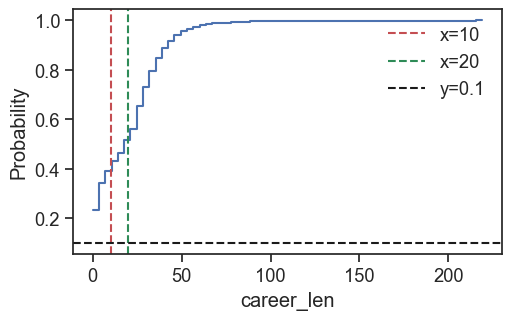

In [40]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

sns.histplot(data=dropout_careerLen, x="career_len",stat='probability',cumulative=1,element='step',fill=0,
             ax=ax)
ax.axvline(x=10,color='r',ls='--',label='x=10')
ax.axvline(x=20,color='seagreen',ls='--',label='x=20')
ax.axhline(y=0.1,color='k',ls='--',label='y=0.1')
plt.legend(frameon=0,loc=1)

#### Survival Rate calcuated by Pub.

In [41]:
neuro_mentees_surviver_0.head(5)

,MenteeID,MentorID,StopYear,surviver,MAGAuthorID,author_id
0,18761,9,1984,1.0,2.809701e+09,A2809701389
1,53604,33687,1997,NaN,1.874842e+09,A1874842480
2,20,24,-1,1.0,2.169128e+09,A2169128453
3,12561,52639,1971,1.0,2.307650e+09,A2307649786
4,188,189,1927,1.0,2.039886e+09,A2039885679


In [42]:
career_span.head(5)

,author_id,first_pub_year,last_pub_year,career_len
0,A100443890,1985,2021,36
1,A10276863,2010,2022,12
2,A102980197,1994,2022,28
3,A1042434965,2004,2022,18
4,A106505410,2003,2008,5


In [43]:
neuro_mentees_info = neuro_mentees_surviver_0.merge(career_span,on='author_id',how='left')

In [44]:
neuro_mentees_info = neuro_mentees_info[~neuro_mentees_info.author_id.isnull()]

In [45]:
neuro_mentees_info.head(5)

,MenteeID,MentorID,StopYear,surviver,MAGAuthorID,author_id,first_pub_year,last_pub_year,career_len
0,18761,9,1984,1.0,2.809701e+09,A2809701389,1986.0,2022.0,36.0
1,53604,33687,1997,NaN,1.874842e+09,A1874842480,1995.0,2021.0,26.0
2,20,24,-1,1.0,2.169128e+09,A2169128453,1985.0,2021.0,36.0
3,12561,52639,1971,1.0,2.307650e+09,A2307649786,1972.0,2010.0,38.0
4,188,189,1927,1.0,2.039886e+09,A2039885679,1928.0,1973.0,45.0


In [46]:
dropout_temp = neuro_mentees_info[neuro_mentees_info.surviver.isnull()]

In [58]:
switch = 1

if switch==1:
    def survival_rate(df):
        try:
            survival_5 = len(df[df.career_len>5])/len(df[df.career_len>0])
            survival_10 = len(df[df.career_len>10])/len(df[df.career_len>0])
            survival_15 = len(df[df.career_len>15])/len(df[df.career_len>0])
        except:
            survival_5 = 0
            survival_10 = 0
            survival_15 = 0
        return [survival_5 ,survival_10 ,survival_15]
    
else:
    def survival_rate(df):
        try:
            survival_5 = len(df[df.career_len>5])/len(df)
            survival_10 = len(df[df.career_len>10])/len(df)
            survival_15 = len(df[df.career_len>15])/len(df)
        except:
            survival_5 = 0
            survival_10 = 0
            survival_15 = 0  
        
        return [survival_5 ,survival_10 ,survival_15]


In [59]:
upbondary = max(neuro_mentees_info.first_pub_year)
print(upbondary )
neuro_mentees_info = neuro_mentees_info[neuro_mentees_info.first_pub_year<upbondary]

2019.0


In [60]:
survival_info = neuro_mentees_info.groupby('first_pub_year').apply(survival_rate).reset_index(name='survival rate')

data = survival_info[(survival_info.first_pub_year>1960)&
             (survival_info.first_pub_year<2005)]

In [61]:
x = list(data.first_pub_year)
temp = list(data['survival rate'])

y5 = [k[0] for k in temp]
y10 = [k[1] for k in temp]
y15 = [k[2] for k in temp]

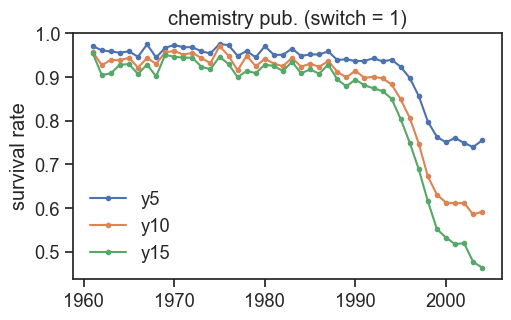

In [62]:
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*5,0.618*5])

# plot
ax.plot(x, y5, label=f'y5', marker='.')
ax.plot(x, y10, label=f'y10', marker='.')
ax.plot(x, y15, label=f'y15', marker='.')

ax.set(ylabel='survival rate',title=f'chemistry pub. (switch = {switch})')
plt.legend(frameon=0)

fig.savefig(f'/Users/yanmemgxing/Desktop/chemistry pub. (switch = {switch}).png',dpi=100)